In [12]:
import pandas as pd


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Introduction

This project examines the impact of the coronavirus pandemic on students'educational plans across the United States using Censius data. My goal in examining this data is to determine whether or not students of color were adversely affected educational wise. This project also delves into economic data to see how the pandemic impacted educational plans of those of various means. If so, what are some possible strategies to aid those that are most in need, and how can programs like the Knowledge House effectively target these populations. 

Hypothesis: I propose that the dropout and deferment rate of students of color will be more than the other groups 
listed in the report due to having to care for a loved one and possible financial hardships caused by the corona virus pandemic. I also believe that those with a lower household income will be more likely impacted than those with a higher household income. 

# Methods

The data used within this study were all excel spreadsheets and had to be properly formatted using google sheets in order to be converted into a csv that could be further converted into a dataframe. While this particular study only focuses on four states, further investigation can be done on the trends in other states, especially for those states where classes are being taken for a different kind of certificate or degree.

In [14]:
student_data = pd.read_csv('US Education Plans - Sheet1.csv')
student_data.head()

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
0,Total,Total*,"43,387,203","13,585,583","5,913,466","19,317,314","5,734,667","822,555","1,615,621","1,728,396"
1,Age,18 - 24,"6,410,262","1,355,242","773,151","3,970,745","1,491,459","205,324","386,967","102,891"
2,Age,25 - 39,"12,658,259","3,979,590","1,948,710","5,325,504","1,583,557","312,756","499,338","622,907"
3,Age,40 - 54,"13,959,975","4,753,738","1,808,371","5,996,368","1,675,431","141,829","468,050","464,776"
4,Age,55 - 64,"7,175,858","2,287,924","895,455","3,129,000","655,538","111,062","184,126","295,415"


In [15]:

student_data.iloc[:,1:] = student_data.iloc[:,1:].replace(',','', regex=True)

In [16]:
student_data.iloc[:,1:] = student_data.iloc[:,1:].replace('-','0', regex=True)

In [17]:
student_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Main Categories                                                        82 non-null     object
 1   Select characteristics                                                 82 non-null     object
 2   Total*                                                                 82 non-null     object
 3   All plans to take classes this term have been canceled                 82 non-null     object
 4   Classes are in different formats this term                             82 non-null     object
 5   Fewer classes are being taken this term                                82 non-null     object
 6   More classes are being taken this term                                 82 non-null     object
 7   C

Columns had to be converted from objects to integers in order for graphs to be made. This was done for each state, and the United States csv.

In [18]:
student_data.dtypes

Main Categories                                                          object
Select characteristics                                                   object
Total*                                                                   object
All plans to take classes this term have been canceled                   object
Classes are in different formats this term                               object
Fewer classes are being taken this term                                  object
More classes are being taken this term                                   object
Classes are being taken from a different institution                     object
Classes are being taken for a different kind of certificate or degree    object
Did not report                                                           object
dtype: object

In [19]:
#student_data['Total*'] = pd.to_numeric(student_data['Total*'])
student_data['All plans to take classes this term have been canceled' ] = pd.to_numeric(student_data['All plans to take classes this term have been canceled']) 
student_data['Classes are in different formats this term'] = pd.to_numeric(student_data['Classes are in different formats this term']) 
student_data['Fewer classes are being taken this term'] = pd.to_numeric(student_data['Fewer classes are being taken this term']) 
student_data['More classes are being taken this term' ] = pd.to_numeric(student_data['More classes are being taken this term']) 
student_data['Classes are being taken from a different institution'] = pd.to_numeric(student_data['Classes are being taken from a different institution'])
student_data['Classes are being taken for a different kind of certificate or degree'] = pd.to_numeric(student_data['Classes are being taken for a different kind of certificate or degree']) 
student_data['Did not report'] = pd.to_numeric(student_data['Did not report']) 


In [20]:
student_data_NY = pd.read_csv('NY Educational Plans - Sheet1.csv')
student_data_NY.head()

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
0,Total,Total*,"2,427,696","710,880","215,344","1,125,819","193,072","34,965","196,172","161,034"
1,Age,18 - 24,"366,813","148,340",-,"218,474","16,101",-,-,-
2,Age,25 - 39,"738,918","289,539","86,356","178,002","48,676","12,670","156,302","53,678"
3,Age,40 - 54,"562,728","128,719","26,943","373,840","49,101","6,805","25,091","7,396"
4,Age,55 - 64,"522,434","71,683","88,389","331,574","67,891","3,147","11,767",-


In [21]:
student_data_NY.iloc[:,1:] = student_data_NY.iloc[:,1:].replace(',','', regex=True)

In [22]:
student_data_NY.iloc[:,1:] = student_data_NY.iloc[:,1:].replace('-','0', regex=True)

In [23]:
#student_data_NY['Total*'] = pd.to_numeric(student_data['Total*'])
student_data_NY['All plans to take classes this term have been canceled' ] = pd.to_numeric(student_data_NY['All plans to take classes this term have been canceled']) 
student_data_NY['Classes are in different formats this term'] = pd.to_numeric(student_data_NY['Classes are in different formats this term']) 
student_data_NY['Fewer classes are being taken this term'] = pd.to_numeric(student_data_NY['Fewer classes are being taken this term']) 
student_data_NY['More classes are being taken this term' ] = pd.to_numeric(student_data_NY['More classes are being taken this term']) 
student_data_NY['Classes are being taken from a different institution'] = pd.to_numeric(student_data_NY['Classes are being taken from a different institution'])
student_data_NY['Classes are being taken for a different kind of certificate or degree'] = pd.to_numeric(student_data_NY['Classes are being taken for a different kind of certificate or degree']) 
student_data_NY['Did not report'] = pd.to_numeric(student_data_NY['Did not report']) 


In [24]:
student_data_NY.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Main Categories                                                        82 non-null     object
 1   Select characteristics                                                 82 non-null     object
 2   Total*                                                                 82 non-null     object
 3   All plans to take classes this term have been canceled                 82 non-null     int64 
 4   Classes are in different formats this term                             82 non-null     int64 
 5   Fewer classes are being taken this term                                82 non-null     int64 
 6   More classes are being taken this term                                 82 non-null     int64 
 7   C

In [25]:
student_data_NJ = pd.read_csv('NJ Educational Plans - Sheet1.csv')
student_data_NJ.head()

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
0,Total*,"1,301,566","500,641","123,657","512,348","65,116","13,865","19,031","91,564",NaN
1,Age,18 - 24,"123,302","27,216",-,"79,828","5,301",-,"2,279","8,678"
2,Age,25 - 39,"338,732","163,115","45,886","69,503","13,873","13,564",-,"41,712"
3,Age,40 - 54,"488,237","195,504","55,455","175,479","22,104",-,"8,388","24,710"
4,Age,55 - 64,"239,172","74,347","8,412","132,229","23,837",302,"8,364","16,464"


In [26]:
student_data_NJ.iloc[:,1:] = student_data_NJ.iloc[:,1:].replace(',','', regex=True)

In [27]:
student_data_NJ.iloc[:,1:] = student_data_NJ.iloc[:,1:].replace('-','0', regex=True)

In [28]:
#student_data_NJ['Total*'] = pd.to_numeric(student_data['Total*'])
student_data_NJ['All plans to take classes this term have been canceled' ] = pd.to_numeric(student_data_NJ['All plans to take classes this term have been canceled']) 
student_data_NJ['Classes are in different formats this term'] = pd.to_numeric(student_data_NJ['Classes are in different formats this term']) 
student_data_NJ['Fewer classes are being taken this term'] = pd.to_numeric(student_data_NJ['Fewer classes are being taken this term']) 
student_data_NJ['More classes are being taken this term' ] = pd.to_numeric(student_data_NJ['More classes are being taken this term']) 
student_data_NJ['Classes are being taken from a different institution'] = pd.to_numeric(student_data_NJ['Classes are being taken from a different institution'])
student_data_NJ['Classes are being taken for a different kind of certificate or degree'] = pd.to_numeric(student_data_NJ['Classes are being taken for a different kind of certificate or degree']) 
student_data_NJ['Did not report'] = pd.to_numeric(student_data_NJ['Did not report']) 


In [29]:
student_data_NJ.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Main Categories                                                        82 non-null     object 
 1   Select characteristics                                                 82 non-null     object 
 2   Total*                                                                 82 non-null     object 
 3   All plans to take classes this term have been canceled                 82 non-null     int64  
 4   Classes are in different formats this term                             82 non-null     int64  
 5   Fewer classes are being taken this term                                82 non-null     int64  
 6   More classes are being taken this term                                 82 non-null     int64

In [30]:
student_data_GA = pd.read_csv('GA Educational Plans - Sheet1.csv')
student_data_GA.head()

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
0,Total*,"1,608,374","621,030","228,744","593,514","200,482","7,819","57,569","35,146",NaN
1,Age,18 - 24,"221,397","94,066","35,588","97,461","21,752",-,"7,333",-
2,Age,25 - 39,"462,926","111,542","107,169","200,427","89,738",-,"27,125","24,073"
3,Age,40 - 54,"549,286","177,083","46,102","223,935","83,657","5,002","23,110","2,625"
4,Age,55 - 64,"275,376","163,328","27,580","65,017","5,336","2,816",-,"3,360"


In [31]:
student_data_GA.iloc[:,1:] = student_data_GA.iloc[:,1:].replace(',','', regex=True)

In [32]:
student_data_GA.iloc[:,1:] = student_data_GA.iloc[:,1:].replace('-','0', regex=True)

In [33]:
#student_data_GA['Total*'] = pd.to_numeric(student_data_GA['Total*'])
student_data_GA['All plans to take classes this term have been canceled' ] = pd.to_numeric(student_data_GA['All plans to take classes this term have been canceled']) 
student_data_GA['Classes are in different formats this term'] = pd.to_numeric(student_data_GA['Classes are in different formats this term']) 
student_data_GA['Fewer classes are being taken this term'] = pd.to_numeric(student_data_GA['Fewer classes are being taken this term']) 
student_data_GA['More classes are being taken this term' ] = pd.to_numeric(student_data_GA['More classes are being taken this term']) 
student_data_GA['Classes are being taken from a different institution'] = pd.to_numeric(student_data_GA['Classes are being taken from a different institution'])
student_data_GA['Classes are being taken for a different kind of certificate or degree'] = pd.to_numeric(student_data_GA['Classes are being taken for a different kind of certificate or degree']) 
student_data_GA['Did not report'] = pd.to_numeric(student_data['Did not report']) 


In [34]:
student_data_GA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Main Categories                                                        82 non-null     object
 1   Select characteristics                                                 82 non-null     object
 2   Total*                                                                 82 non-null     object
 3   All plans to take classes this term have been canceled                 82 non-null     int64 
 4   Classes are in different formats this term                             82 non-null     int64 
 5   Fewer classes are being taken this term                                82 non-null     int64 
 6   More classes are being taken this term                                 82 non-null     int64 
 7   C

In [35]:
student_data_CA = pd.read_csv('CA Educational Plans - Sheet1.csv')
student_data_CA.head()

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
0,Total*,"6,426,008","1,403,326","973,650","3,359,334","1,287,192","211,357","321,306","177,169",NaN
1,Age,18 - 24,"1,099,022","83,640","192,308","636,536","454,255","60,855","104,041","25,425"
2,Age,25 - 39,"1,829,230","465,112","283,617","989,789","351,723","112,251","78,331","23,838"
3,Age,40 - 54,"1,879,247","493,047","236,163","969,680","308,583","10,755","49,040","54,903"
4,Age,55 - 64,"1,123,573","230,567","178,709","545,084","86,233","23,755","88,474","59,391"


In [36]:
student_data_CA.iloc[:,1:] = student_data_CA.iloc[:,1:].replace(',','', regex=True)

In [37]:
student_data_CA.iloc[:,1:] = student_data_CA.iloc[:,1:].replace('-','0', regex=True)

In [38]:
#student_data_CA['Total*'] = pd.to_numeric(student_data_CA['Total*'])
student_data_CA['All plans to take classes this term have been canceled' ] = pd.to_numeric(student_data_CA['All plans to take classes this term have been canceled']) 
student_data_CA['Classes are in different formats this term'] = pd.to_numeric(student_data_CA['Classes are in different formats this term']) 
student_data_CA['Fewer classes are being taken this term'] = pd.to_numeric(student_data_CA['Fewer classes are being taken this term']) 
student_data_CA['More classes are being taken this term' ] = pd.to_numeric(student_data_CA['More classes are being taken this term']) 
student_data_CA['Classes are being taken from a different institution'] = pd.to_numeric(student_data_CA['Classes are being taken from a different institution'])
student_data_CA['Classes are being taken for a different kind of certificate or degree'] = pd.to_numeric(student_data_CA['Classes are being taken for a different kind of certificate or degree']) 
student_data_CA['Did not report'] = pd.to_numeric(student_data_CA['Did not report']) 


In [39]:
student_data_CA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype  
---  ------                                                                 --------------  -----  
 0   Main Categories                                                        82 non-null     object 
 1   Select characteristics                                                 82 non-null     object 
 2   Total*                                                                 82 non-null     object 
 3   All plans to take classes this term have been canceled                 82 non-null     int64  
 4   Classes are in different formats this term                             82 non-null     int64  
 5   Fewer classes are being taken this term                                82 non-null     int64  
 6   More classes are being taken this term                                 82 non-null     int64

# Analysis Section

This particular study focuses on how the pandemic affected academic plans within New York, New Jersey, Georgia, and California. further investigation can be done on the trends in other states, especially for those states where classes are being taken for a different kind of certificate or degree, perhaps those places will be good places for The Knowledge House to expand. 

In looking at the main categories, those students with a Latino background, and with two or more races(non-Hispanic) had the lowest amount of those that cancelled classes for the term, with 29% and 24% (respectively) of those that completed the survey. Blacks and Whites had the highest amount of those cancelling classes, with 34% and 32%, respectively. Asians also had a significant amount of those that cancelled classes for the semester, with 32%.

Most of the groups opted to take fewer classes this semester. 4,153,907 Latinos(almost half of those taken the Census) and 1,899,710 Blacks took fewer classes due to the pandemic. Blacks cancelled classes rather than opting to take fewer classes.  11,125,482 Whites took fewer classes, while 1,346,502 Asians took fewer classes. Those with two or more races had the lowest amount of students that took fewer classes compared with other ethinicites in the group with 791,714.

A small but significant amount of the population took classes for a different type of certificate or degree due to the pandemic: Latinos(427,287), Whites(851,577) and Blacks(187,110) were among the highest.

In [40]:
Analysis_US = student_data[(student_data['Main Categories'] == "Hispanic origin and Race")]
Analysis_US

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
8,Hispanic origin and Race,Hispanic or Latino (may be of any race),9519787,2784447,1333285,4153907,1247803,208867,427287,427903
9,Hispanic origin and Race,White alone not Hispanic,23014078,7364184,2960300,11125482,2780621,349961,851577,796037
10,Hispanic origin and Race,Black alone not Hispanic,5847773,1996335,975228,1899710,932765,80137,187110,250151
11,Hispanic origin and Race,Asian alone not Hispanic,2986439,954847,252837,1346502,429381,57951,55129,198563
12,Hispanic origin and Race,Two or more races + Other races not Hispanic,2019127,485770,391817,791714,344097,125639,94518,55743


In [41]:
student_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 10 columns):
 #   Column                                                                 Non-Null Count  Dtype 
---  ------                                                                 --------------  ----- 
 0   Main Categories                                                        82 non-null     object
 1   Select characteristics                                                 82 non-null     object
 2   Total*                                                                 82 non-null     object
 3   All plans to take classes this term have been canceled                 82 non-null     int64 
 4   Classes are in different formats this term                             82 non-null     int64 
 5   Fewer classes are being taken this term                                82 non-null     int64 
 6   More classes are being taken this term                                 82 non-null     int64 
 7   C

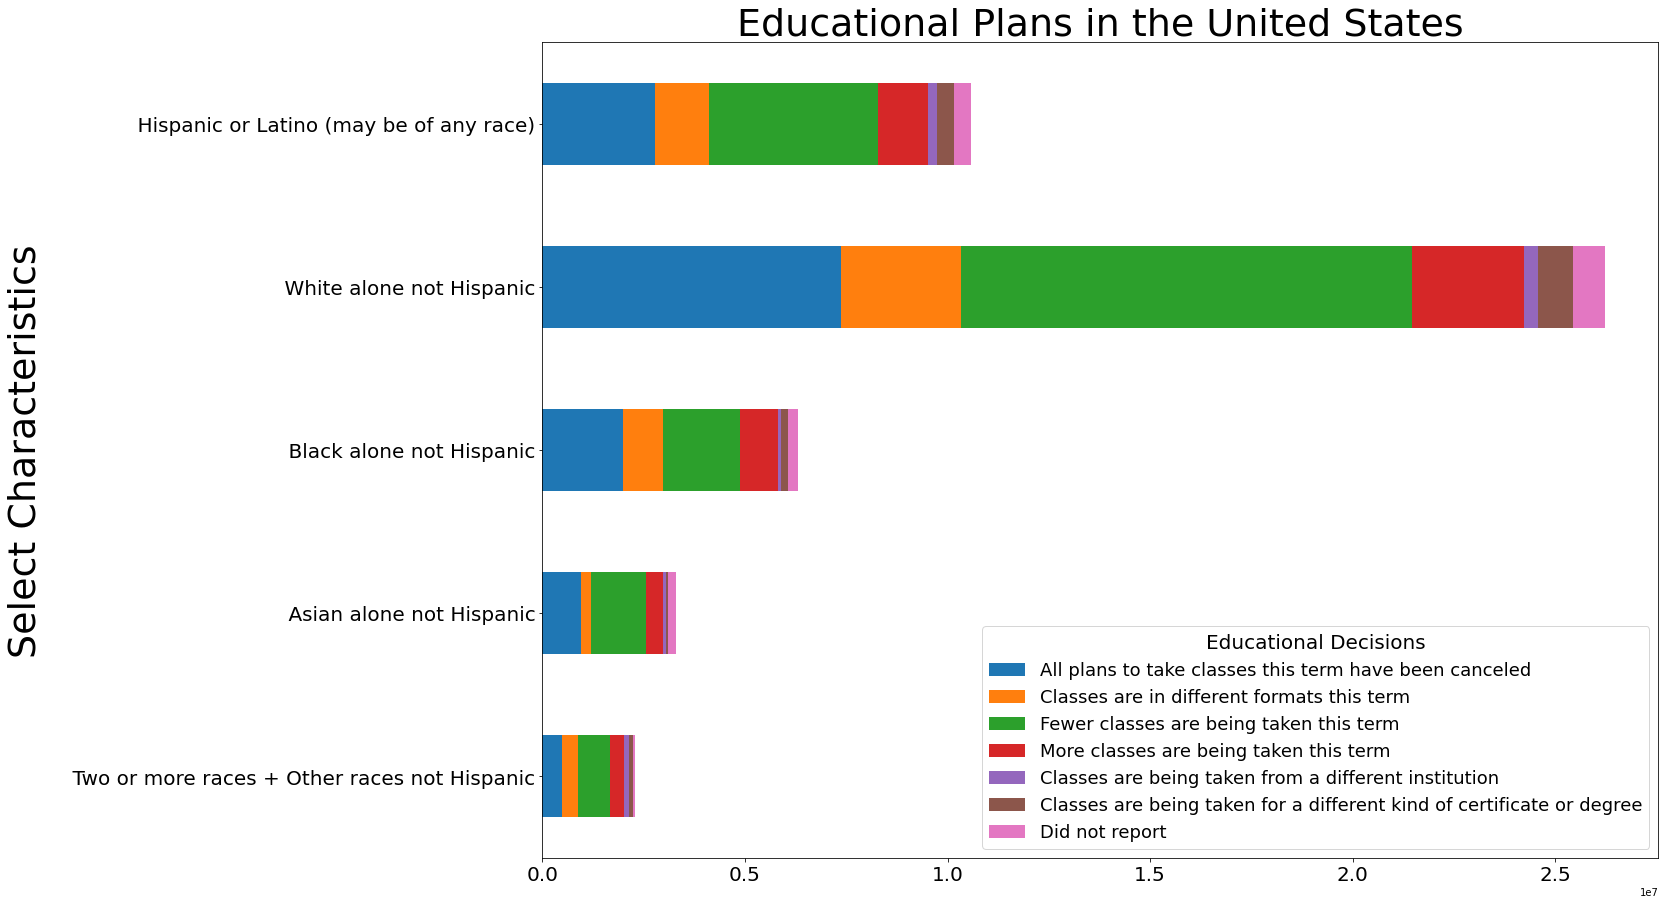

In [101]:

Analysis_US.sort_index(ascending=False).plot.barh(x='Select characteristics',fontsize=20, stacked=True, figsize=(20,15))
plt.title('Educational Plans in the United States', fontsize=38)
plt.ylabel('Select Characteristics', fontsize=38)
plt.legend(loc = 'lower right', fontsize = '18', title = 'Educational Decisions', title_fontsize = '20')
plt.show()



In New York, Whites had the highest amount of those that cancelled classes and took fewer classes. Blacks had the second highest amount of people that cancelled classes(116,296), while Hispanics had the third highest amount(103,508).Hispanics had the second highest amount of those that took fewer classes(252,337). Those with two or more races have the least amount of those that cancelled classes, and also that took fewer classes due to the pandemic.


In [97]:
Analysis_NY = student_data_NY[student_data_NY['Main Categories'].str.contains("Hispanic origin and Race")]
Analysis_NY 

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
8,Hispanic origin and Race,Hispanic or Latino (may be of any race),592342,103508,30211,252337,45535,12670,126998,42597
9,Hispanic origin and Race,White alone not Hispanic,1229404,409133,64621,667368,93833,9952,69175,89074
10,Hispanic origin and Race,Black alone not Hispanic,267907,116296,40330,91298,6248,12343,0,7639
11,Hispanic origin and Race,Asian alone not Hispanic,236241,68945,11916,98291,35023,0,0,21723
12,Hispanic origin and Race,Two or more races + Other races not Hispanic,101803,12998,68267,16524,12434,0,0,0


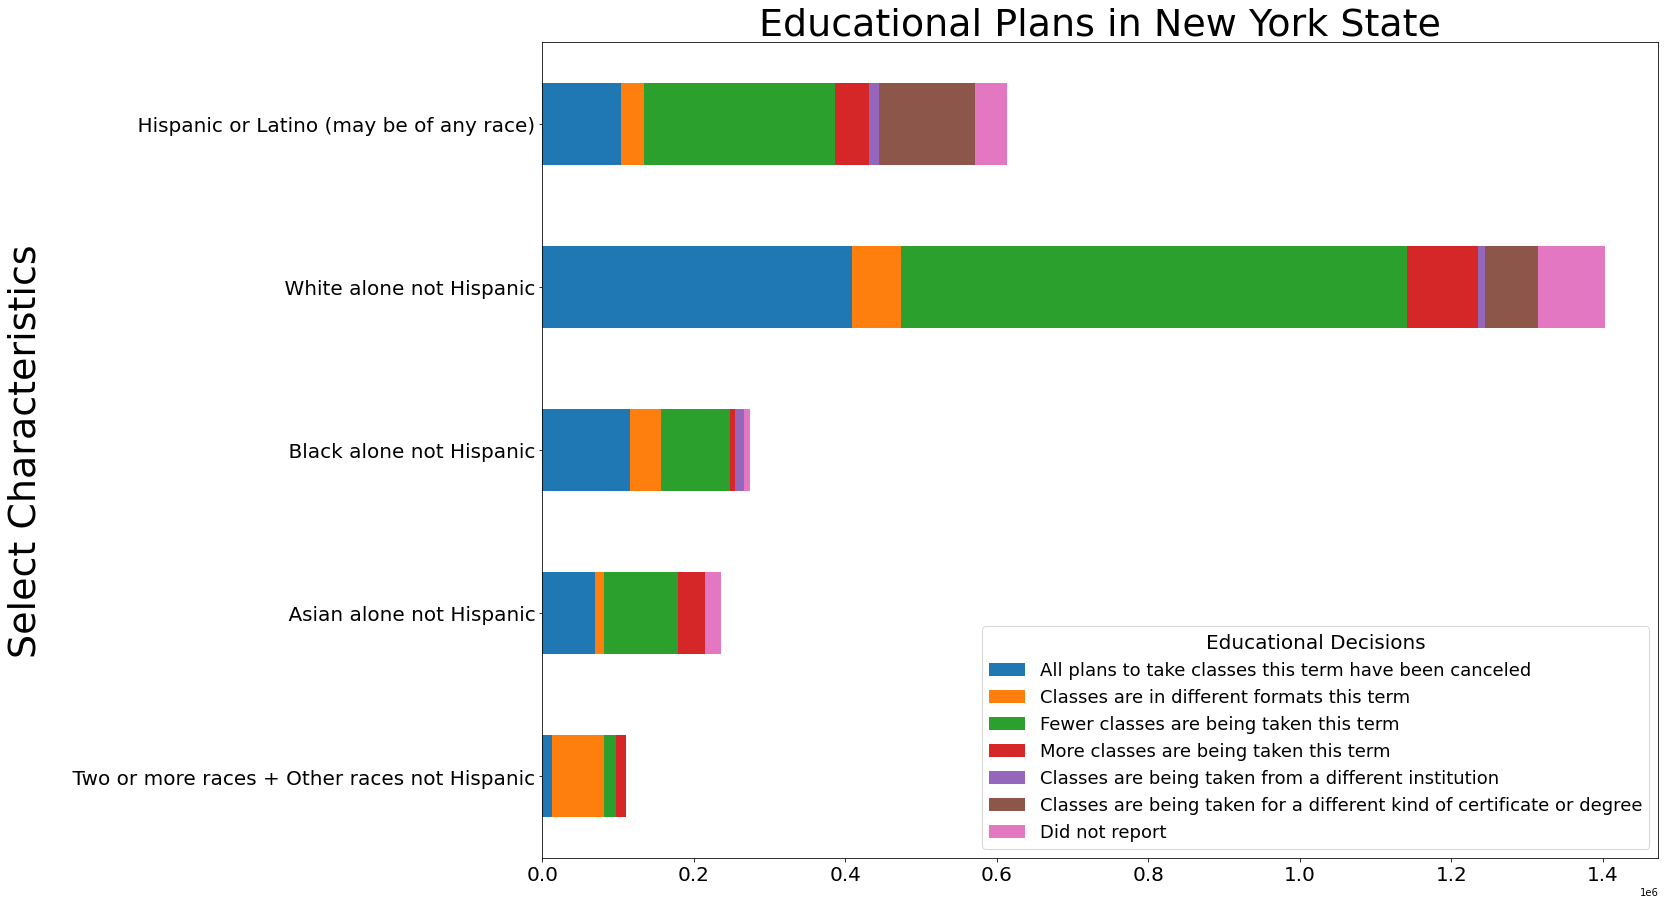

In [99]:
Analysis_NY.sort_index(ascending=False).plot.barh(x='Select characteristics',fontsize=20, stacked=True, figsize=(20,15))
plt.title('Educational Plans in New York State', fontsize=38)
plt.ylabel('Select Characteristics', fontsize=38)
plt.legend(loc = 'lower right', fontsize = '18', title = 'Educational Decisions', title_fontsize = '20')
plt.show()


In NJ, Latinos had the highest amount of those that cancelled classes(228,522) and Whites had the second highest number of those that cancelled classes. Blacks had the second lowest amount(49,171) of those that cancelled classes while those with two or more races and the lowest amount(3,646). More Blacks opted to take fewer classes(101,416) as well as Whites(255,494)

In [88]:
Analysis_NJ = student_data_NJ[student_data_NJ['Main Categories'].str.contains("Hispanic origin and Race")]
Analysis_NJ

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
8,Hispanic origin and Race,Hispanic or Latino (may be of any race),382362,228522,33152,77777,10926,0,1571,32568.0
9,Hispanic origin and Race,White alone not Hispanic,511895,157296,43899,255494,32354,3287,17460,29190.0
10,Hispanic origin and Race,Black alone not Hispanic,185355,49171,20739,101416,1264,0,0,12765.0
11,Hispanic origin and Race,Asian alone not Hispanic,170761,62006,8123,65015,18458,10578,0,8363.0
12,Hispanic origin and Race,Two or more races + Other races not Hispanic,51192,3646,17744,12645,2113,0,0,8678.0


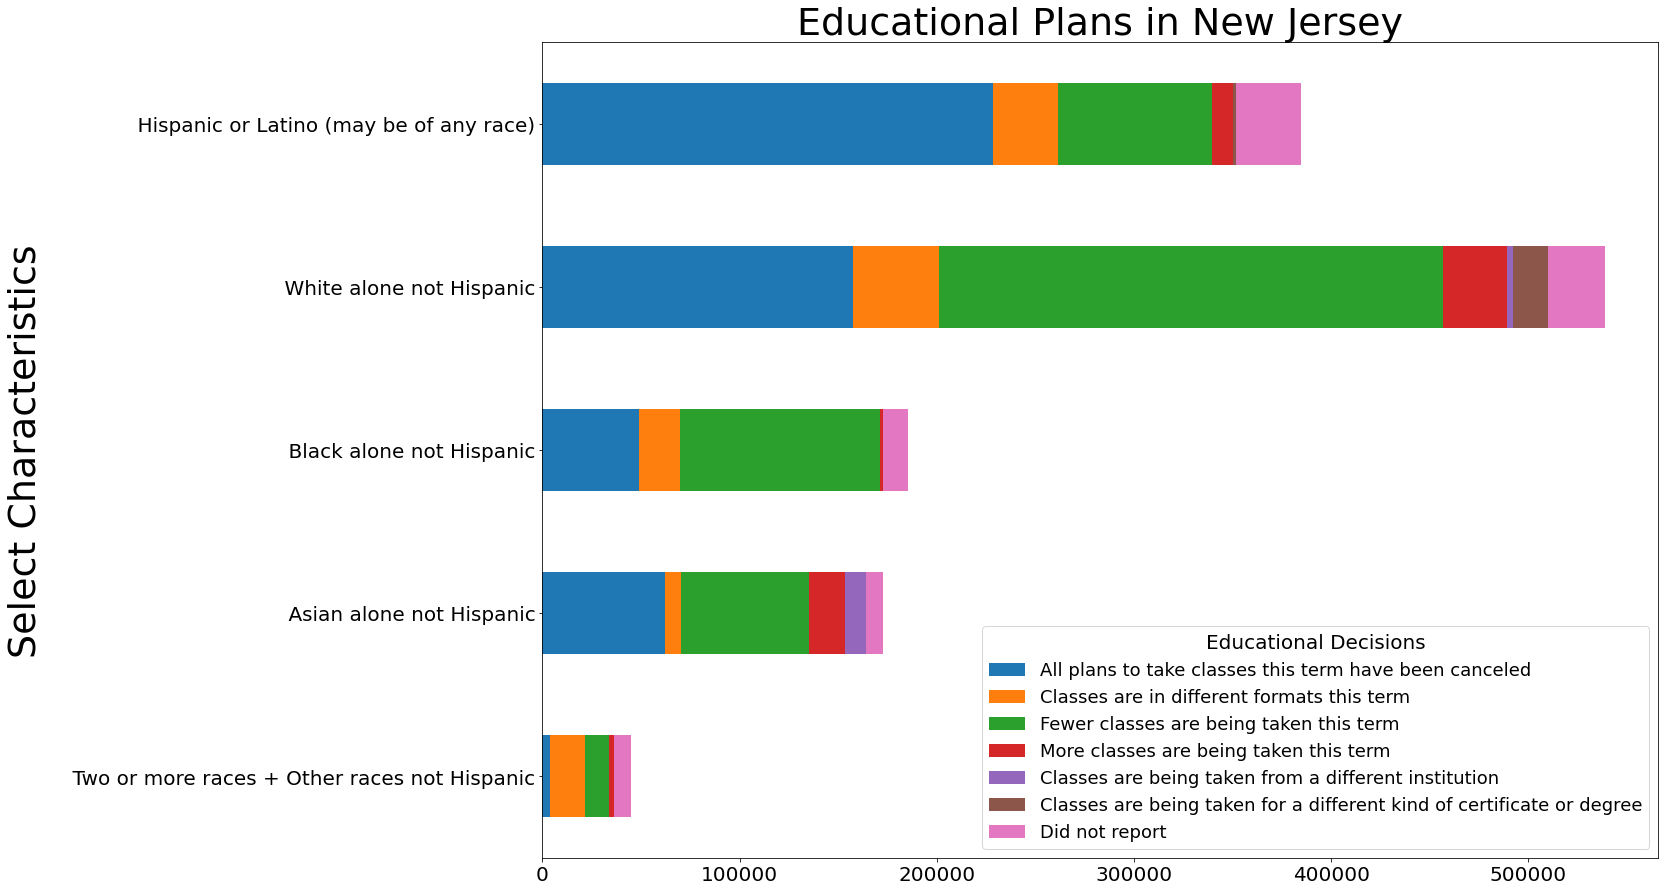

In [90]:
Analysis_NJ.sort_index(ascending=False).plot.barh(x='Select characteristics',fontsize=20, stacked=True, figsize=(20,15))
plt.title('Educational Plans in New Jersey', fontsize=38)
plt.ylabel('Select Characteristics', fontsize=38)
plt.legend(loc = 'lower right', fontsize = '18', title = 'Educational Decisions', title_fontsize = '20')
plt.show()

In Georgia, Blacks and Whites had the highest amount of students that cancelled classes, with 231,007 and 296,124, respectively. They also had the highest amount of students that took fewer classes, with 188,911 and 306,862, respectively. Latinos were in the middle with 67,269, while those that identify as having two or more races had 13,416 who cancelled classes. 45,335 Latinos took fewer classes, while those that identify as having two or more races had the lowest figure with 15,494.

In [86]:
Analysis_GA = student_data_GA[student_data_GA['Main Categories'].str.contains("Hispanic origin and Race")]
Analysis_GA

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
8,Hispanic origin and Race,Hispanic or Latino (may be of any race),162546,67269,36860,45335,11004,0,0,427903
9,Hispanic origin and Race,White alone not Hispanic,756425,296124,98604,306862,91827,7819,34899,796037
10,Hispanic origin and Race,Black alone not Hispanic,555795,231007,86879,188911,58238,0,22670,250151
11,Hispanic origin and Race,Asian alone not Hispanic,63998,13214,0,36912,25513,0,0,198563
12,Hispanic origin and Race,Two or more races + Other races not Hispanic,69610,13416,6402,15494,13900,0,0,55743


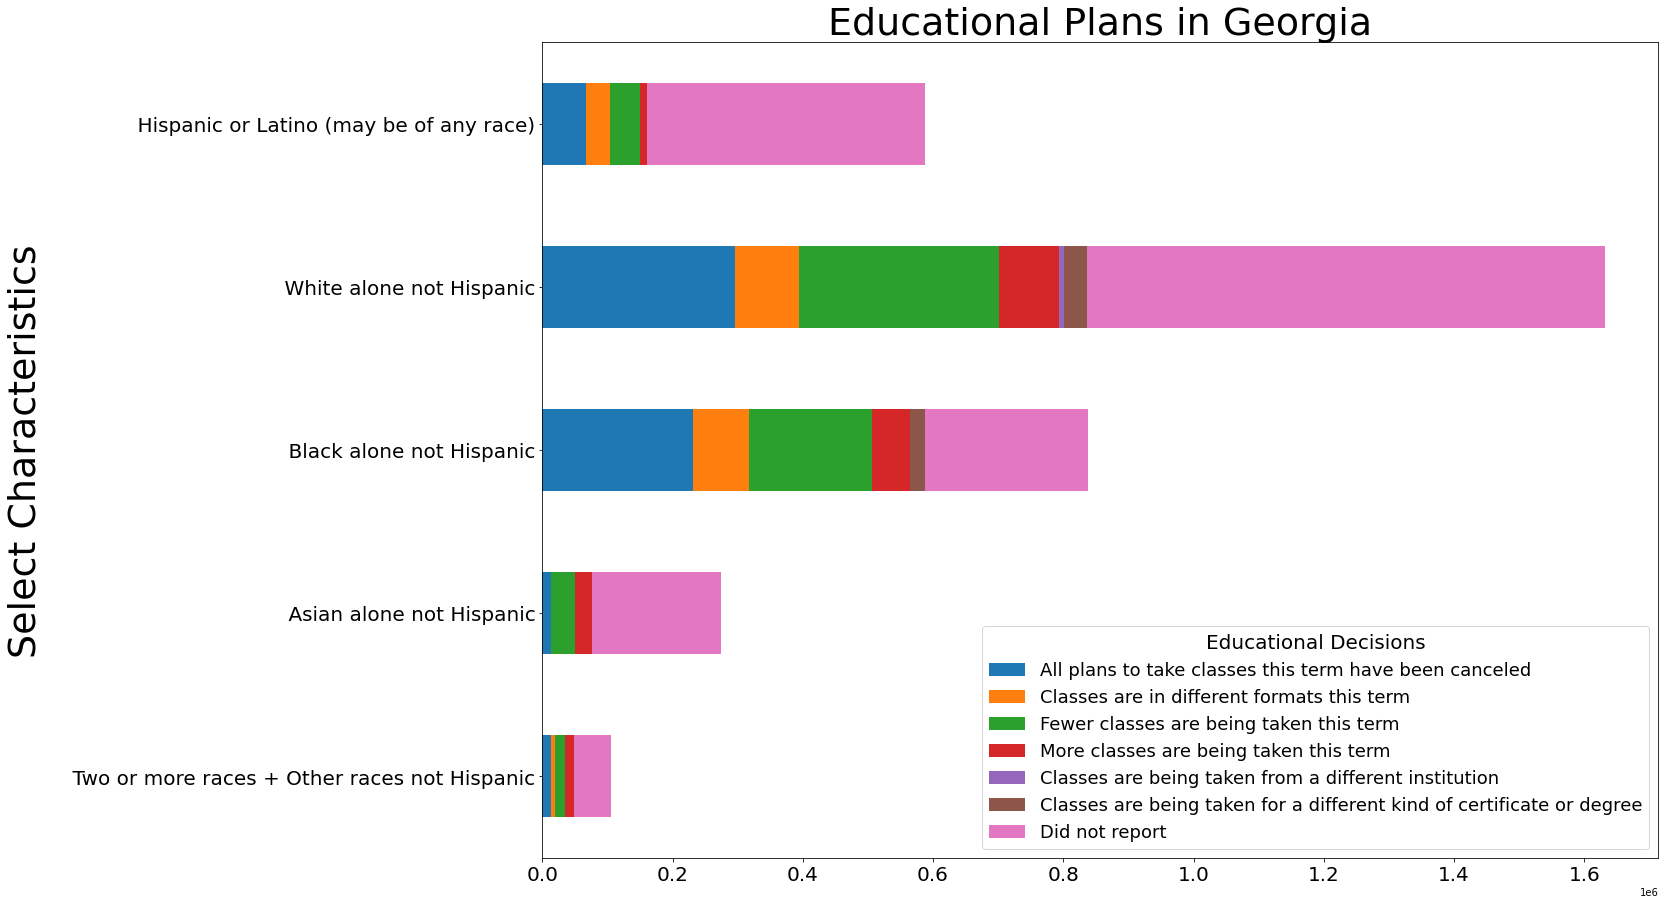

In [91]:
Analysis_GA.sort_index(ascending=False).plot.barh(x='Select characteristics',fontsize=20, stacked=True, figsize=(20,15))
plt.title('Educational Plans in Georgia', fontsize=38)
plt.ylabel('Select Characteristics', fontsize=38)
plt.legend(loc = 'lower right', fontsize = '18', title = 'Educational Decisions', title_fontsize = '20')
plt.show()

Latinos had the highest amount of students that cancelled classes(494,630), followed by Whites(413,020). The same pattern repeats in the fewer classes column, with 1,421,287 and 1,084,122, respectively. Students that identify with two or more races had 103,126 cancel classes, and 201,399 students that took fewer classes. Blacks were among the lowests that cancelled classes with 148,402, and 113,113 that took fewer classes.

In [84]:
Analysis_CA = student_data_CA[student_data_CA['Main Categories'].str.contains("Hispanic origin and Race")]
Analysis_CA

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
8,Hispanic origin and Race,Hispanic or Latino (may be of any race),2566783,494630,374836,1421287,507873,118633,190094,53538.0
9,Hispanic origin and Race,White alone not Hispanic,1949873,413020,332109,1084122,287349,34617,76494,79721.0
10,Hispanic origin and Race,Black alone not Hispanic,509208,148402,70056,113113,227798,3363,3654,1778.0
11,Hispanic origin and Race,Asian alone not Hispanic,989791,244149,140862,539414,140042,13793,33396,38532.0
12,Hispanic origin and Race,Two or more races + Other races not Hispanic,410354,103126,55787,201399,124129,40952,17667,3600.0


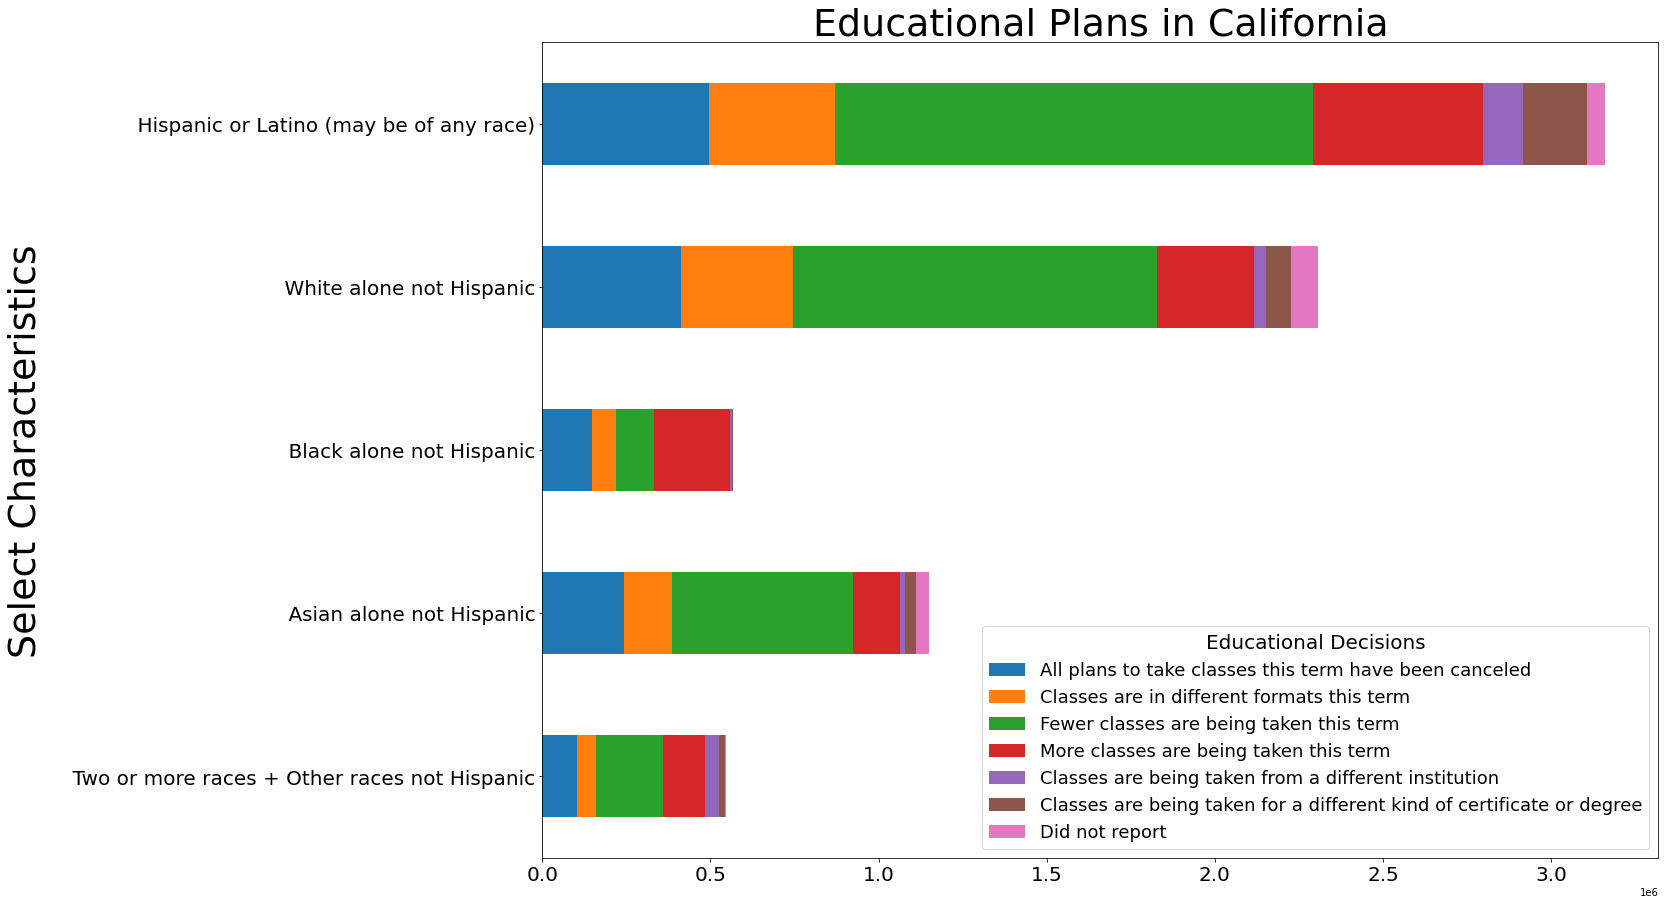

In [92]:
Analysis_CA.sort_index(ascending=False).plot.barh(x='Select characteristics',fontsize=20, stacked=True, figsize=(20,15))
plt.title('Educational Plans in California', fontsize=38)
plt.ylabel('Select Characteristics', fontsize=38)
plt.legend(loc = 'lower right', fontsize = '18', title = 'Educational Decisions', title_fontsize = '20')
plt.show()

Those with incomes of less than 25,000 cancelled classes the most along with those with a household income of 75,000-99999 and 100000-149999. Those with incomes in the 75,000-99999 and 100000-149999 range also had the most that took fewer classes with 207,317 and 246,207, resepectively.

In [71]:
Analysis_NY = student_data_NY[student_data_NY['Main Categories'].str.contains("Household income")]
Analysis_NY

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
37,Household income,Less than $25000,328731,124089,38427,66188,16101,0,61923,28238
38,Household income,$25000 0 $34999,288337,96137,72877,119324,0,0,3153,0
39,Household income,$35000 0 $49999,202692,60921,7222,66879,7325,0,72832,0
40,Household income,$50000 0 $74999,255107,88373,23430,134372,31650,6805,11029,0
41,Household income,$75000 0 $99999,343526,103137,16650,207317,21091,12670,0,0
42,Household income,$100000 0 $149999,462876,156802,45357,246207,52016,12343,3012,0
43,Household income,$150000 0 $199999,145199,27979,8689,94506,32456,0,32456,14025
44,Household income,$200000 and above,251284,41147,2693,172149,32432,3147,11767,0
45,Household income,Did not report,149944,12296,0,18877,0,0,0,118771


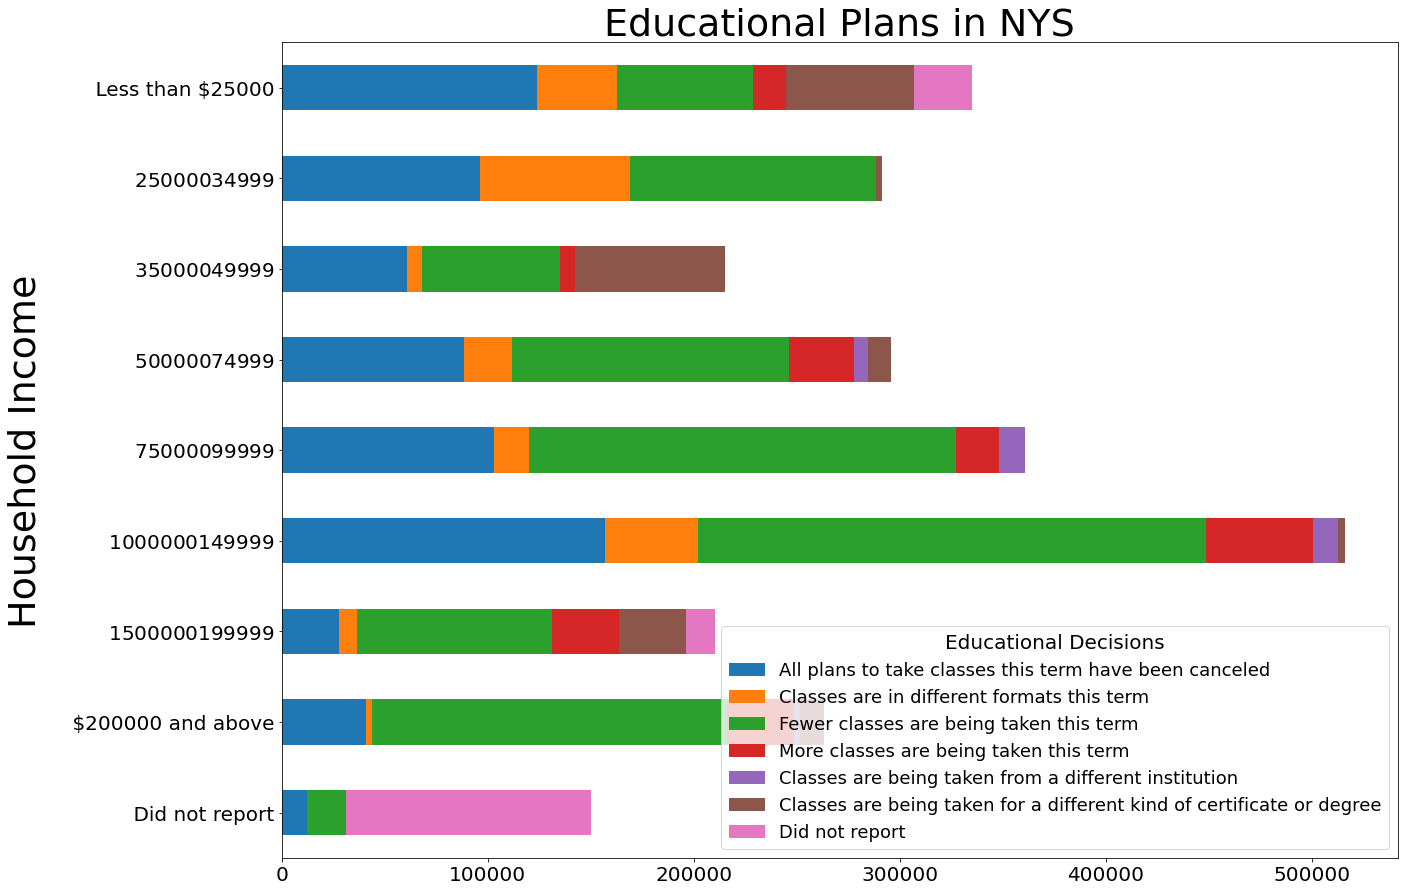

In [93]:
Analysis_NY.sort_index(ascending=False).plot.barh(x='Select characteristics',fontsize=20, stacked=True, figsize=(20,15))
plt.title('Educational Plans in NYS', fontsize=38)
plt.ylabel('Household Income', fontsize=38)
plt.legend(loc = 'lower right', fontsize = '18', title = 'Educational Decisions', title_fontsize = '20')
plt.show()

In New Jersey, those with a household income of 75,000 to 99,999 had the highest values of those that cancelled classes, as well as those with an income of 100,00-149,999, which had 97,220. For those making less than 25,000 and 25000 to 34,999, close to half had to cancel classes for the semester. Those that had a household income of 100,000− 149,999 also had the highest amount of those that took fewer classes for the semester.

In [102]:
Analysis_NJ = student_data_NJ[student_data_NJ['Main Categories'].str.contains("Household income")]
Analysis_NJ

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
37,Household income,Less than $25000,95575,50752,5852,3362,0,0,2279,24534.0
38,Household income,$25000 0 $34999,107520,50837,8679,48003,6129,0,1571,0.0
39,Household income,$35000 0 $49999,200241,60671,34357,85290,25721,0,0,3475.0
40,Household income,$50000 0 $74999,180720,75882,17187,63866,1936,0,0,20861.0
41,Household income,$75000 0 $99999,204704,105975,27749,65101,12503,0,0,0.0
42,Household income,$100000 0 $149999,237803,97220,5633,106156,9726,10880,0,17705.0
43,Household income,$150000 0 $199999,122296,23704,22537,59577,5492,0,8388,12765.0
44,Household income,$200000 and above,115214,23109,1663,68215,3609,2985,6792,0.0
45,Household income,Did not report,37494,12491,0,12778,0,0,0,12224.0


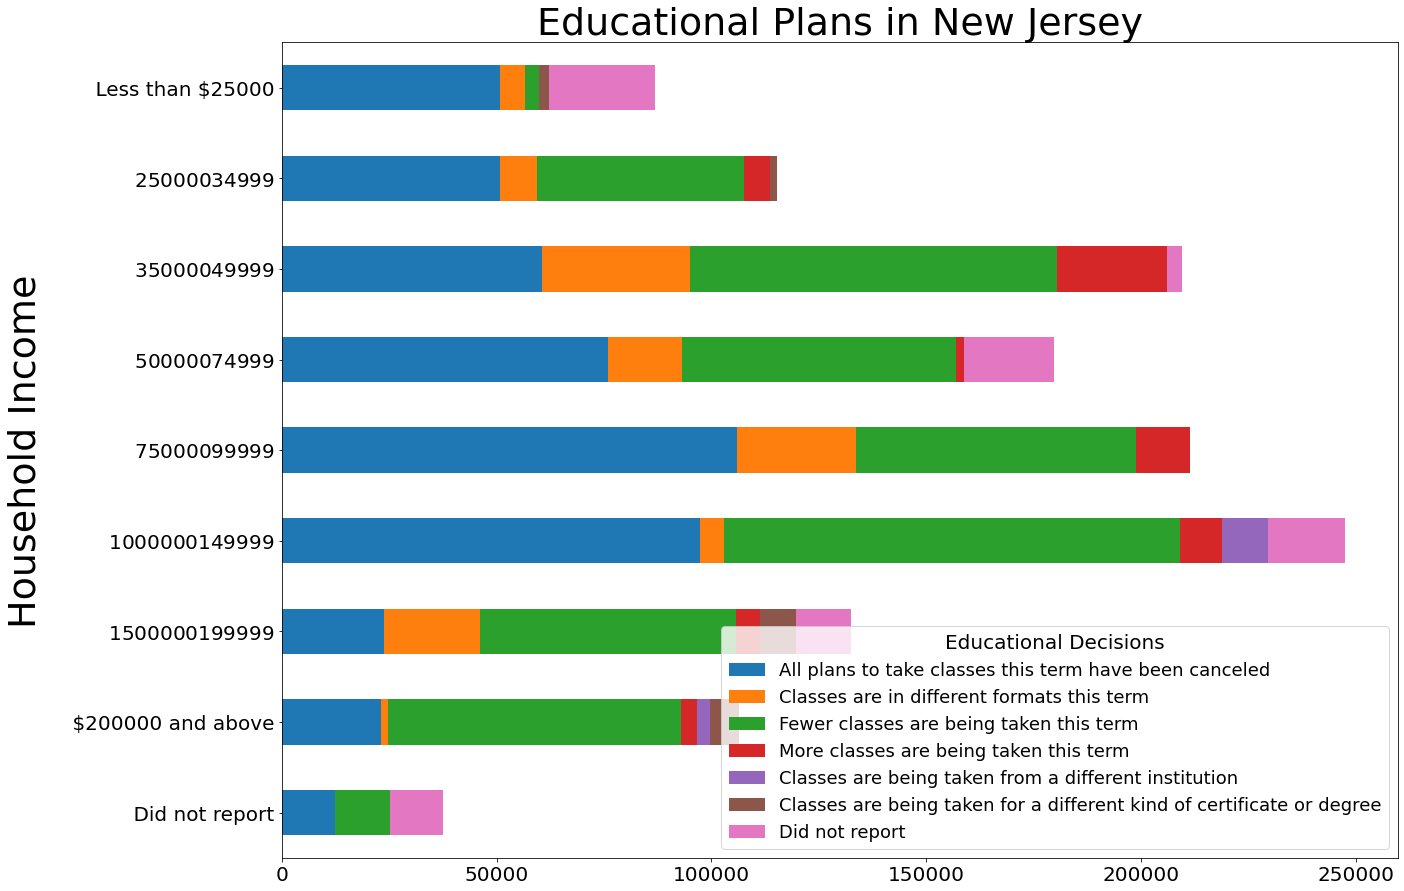

In [103]:
Analysis_NJ.sort_index(ascending=False).plot.barh(x='Select characteristics',fontsize=20, stacked=True, figsize=(20,15))
plt.title('Educational Plans in New Jersey', fontsize=38)
plt.ylabel('Household Income', fontsize=38)
plt.legend(loc = 'lower right', fontsize = '18', title = 'Educational Decisions', title_fontsize = '20')
plt.show()

In Georgia, those with a household income of less than 25,000 had the most amount of individuals that cancelled classes and also had 111,402 individuals that took fewer classes in the semester. Those with income of 50,000− 74,999 had the highest amount of those taking fewer classes with 124,883	

In [78]:
Analysis_GA = student_data_GA[student_data_GA['Main Categories'].str.contains("Household income")]
Analysis_GA

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
37,Household income,Less than $25000,333491,115788,49575,111402,43590,0,15337,183577
38,Household income,$25000 0 $34999,264120,91012,54651,89758,27144,0,7333,85592
39,Household income,$35000 0 $49999,217832,82428,17971,74555,73313,0,30748,212614
40,Household income,$50000 0 $74999,247710,69644,34140,124883,27416,0,0,241051
41,Household income,$75000 0 $99999,97425,40488,11562,45949,1917,0,0,91790
42,Household income,$100000 0 $149999,130113,79869,18950,41466,17695,0,1511,123755
43,Household income,$150000 0 $199999,174710,79967,18929,60862,4701,5002,0,73528
44,Household income,$200000 and above,72921,16009,20586,33686,0,2816,2640,58277
45,Household income,Did not report,70052,45827,2381,10952,4705,0,0,658212


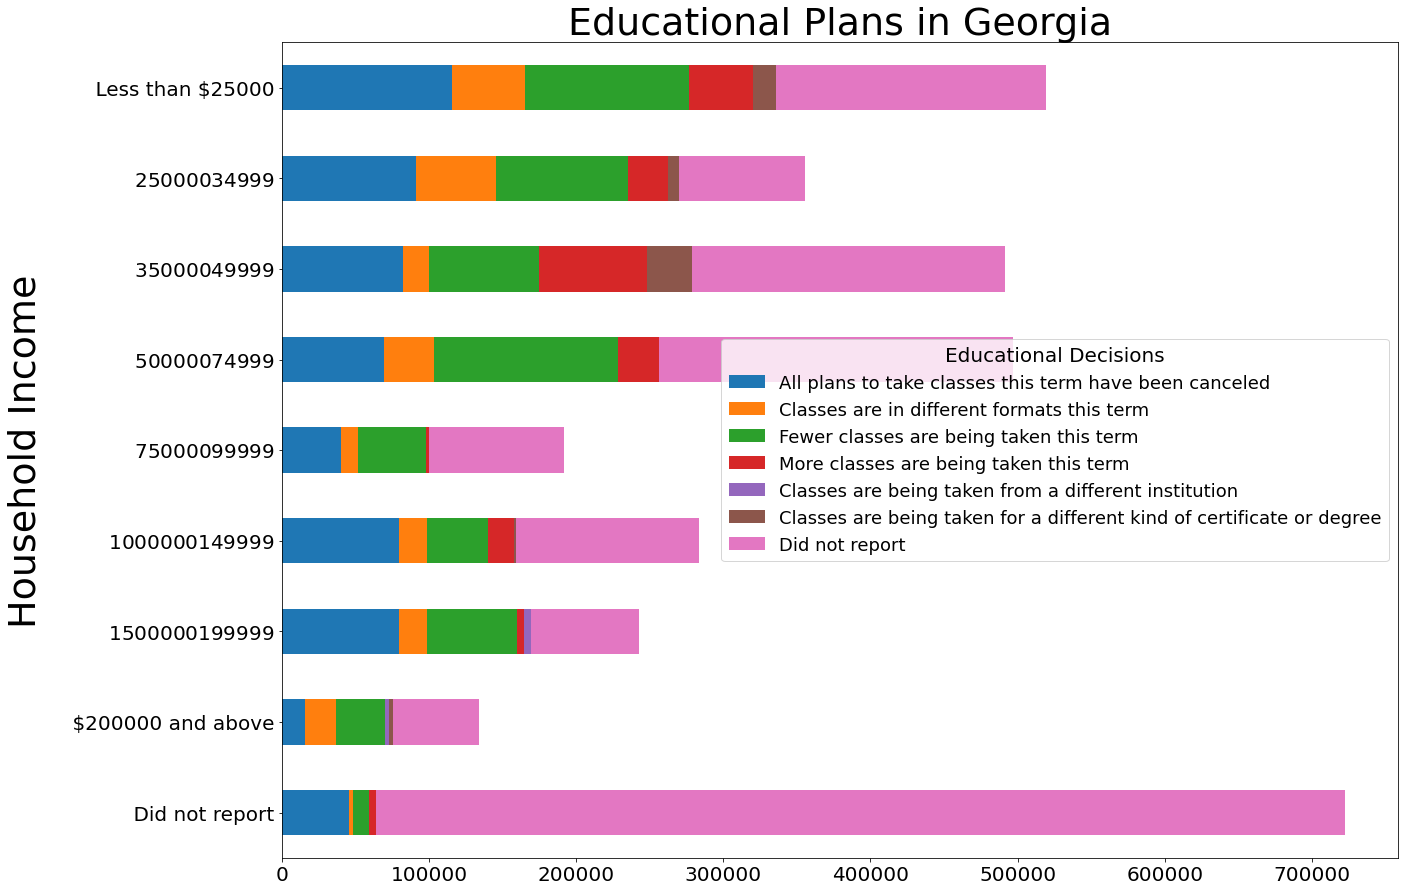

In [79]:
Analysis_GA.sort_index(ascending=False).plot.barh(x='Select characteristics',fontsize=20, stacked=True, figsize=(20,15))
plt.title('Educational Plans in Georgia', fontsize=38)
plt.ylabel('Household Income', fontsize=38)
plt.legend(loc = 'center right', fontsize = '18', title = 'Educational Decisions', title_fontsize = '20')
plt.show()

In California, those with a househod income of 100,000− 149,999 had the most amount of students that cancelled their classes. Many more students took fewer classes in each type of household income, the highest belonging to those to the 75,000− 99,999 bracket with 544,207.	

In [104]:
Analysis_CA = student_data_CA[student_data_CA['Main Categories'].str.contains("Household income")]
Analysis_CA

,Main Categories,Select characteristics,Total*,All plans to take classes this term have been canceled,Classes are in different formats this term,Fewer classes are being taken this term,More classes are being taken this term,Classes are being taken from a different institution,Classes are being taken for a different kind of certificate or degree,Did not report
37,Household income,Less than $25000,722005,109550,132745,426936,203154,4231,30151,2148.0
38,Household income,$25000 0 $34999,795074,68917,93465,366524,277033,91512,35557,10438.0
39,Household income,$35000 0 $49999,866953,116095,180731,476558,153775,37517,97361,6988.0
40,Household income,$50000 0 $74999,940372,264468,133911,445675,193204,33205,15677,22904.0
41,Household income,$75000 0 $99999,943459,212765,180587,544207,180929,18038,66581,27468.0
42,Household income,$100000 0 $149999,979804,322845,121742,486430,140040,18109,41249,12700.0
43,Household income,$150000 0 $199999,435935,174832,16914,223199,47809,4689,27287,3064.0
44,Household income,$200000 and above,532783,90977,89996,313401,86900,954,2751,35618.0
45,Household income,Did not report,209623,42878,23558,76403,4349,3103,4691,55842.0


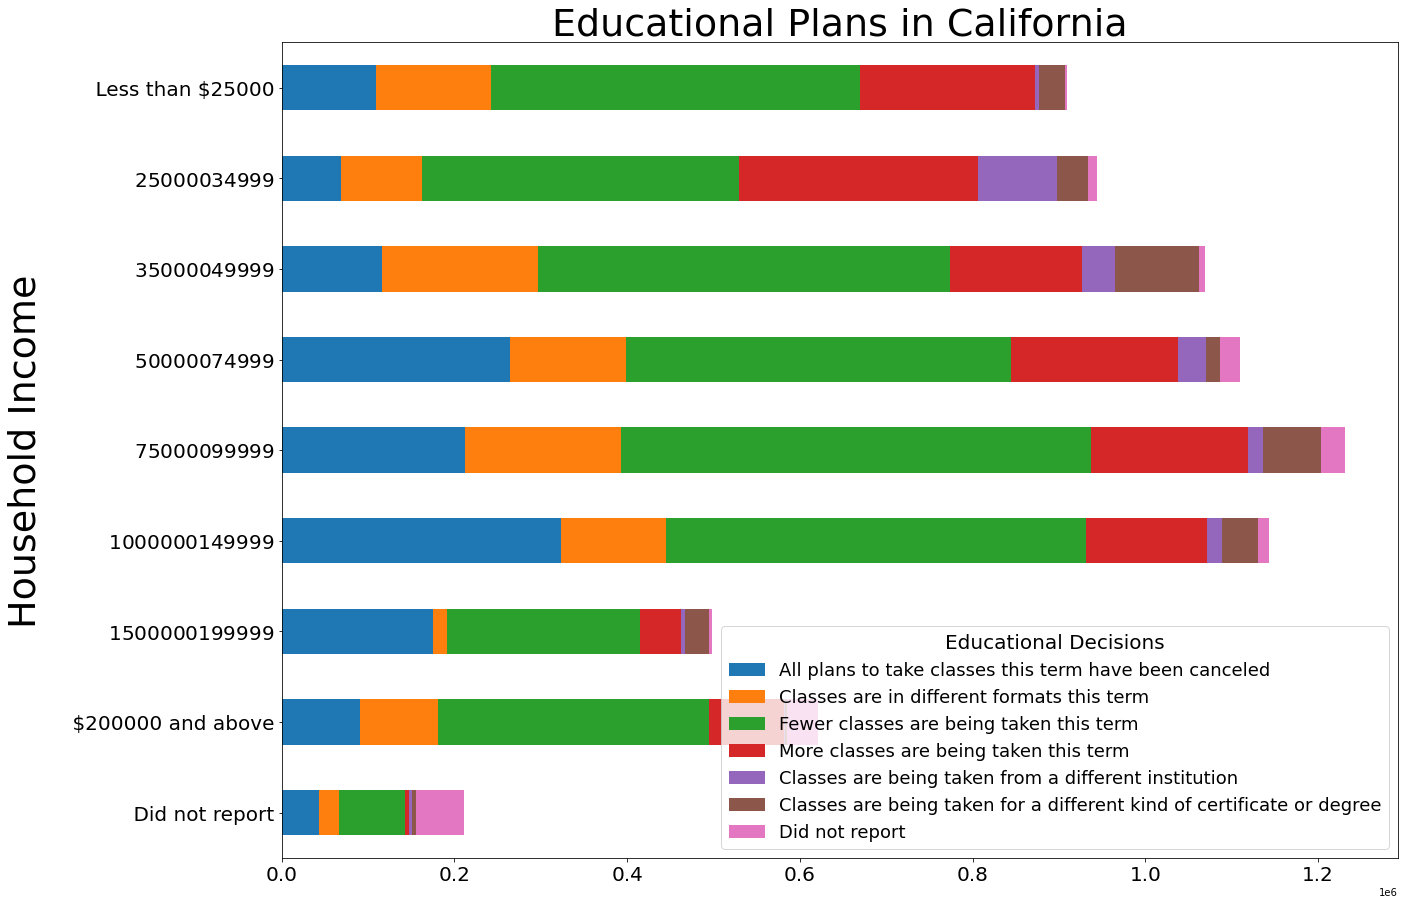

In [105]:
Analysis_CA.sort_index(ascending=False).plot.barh(x='Select characteristics',fontsize=20, stacked=True, figsize=(20,15))
plt.title('Educational Plans in California', fontsize=38)
plt.ylabel('Household Income', fontsize=38)
plt.legend(loc = 'lower right', fontsize = '18', title = 'Educational Decisions', title_fontsize = '20')
plt.show()

# Conclusion

In New York State and California, Whites had the highest amount of those that cancelled classes for the semester.  Many students of color opted to take fewer classes for the semester instead of cancelling classes altogether. In New Jersey and California, more Latinos decided to cancel classes for the semester.In my research, I found that educational plans for those with a moderate income were impacted, as well as those in the upper-middle class, especially in the states of New York and New Jersey. In Georgia, while many did not report their plans, those with a household income of less than 25,000 were more impacted.

While this particular study focuses on how the pandemic affected academic plans within New York, New Jersey, Georgia, and California, further investigation can be done on the trends in other states, especially for those states where classes are being taken for a different kind of certificate or degree, perhaps those places will be good places for The Knowledge House to expand if those degrees or certificates were tech-related.

# Appendix

Data collected from census.gov: https://www.census.gov/data/tables/2021/demo/hhp/hhp29.html#tables 